In [182]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [183]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import mpl_toolkits
#from mpl_toolkits.basemap import Basemap
import pandas as pd
import xarray as xr
import Nio
print (Nio.__version__)
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import signal
%matplotlib inline

print("python version:")
import platform
print(platform.python_version())

1.5.5
python version:
3.7.3


In [184]:
sstdat = xr.open_dataset('http://apdrc.soest.hawaii.edu/dods/public_data/NOAA_SST/ERSST/monthly_v5')
#sstdat
sst = sstdat['sst']
sst

#note: lat & lon go by scale of 2 degrees

<xarray.DataArray 'sst' (time: 2004, lat: 89, lon: 180)>
[32104080 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2020-12-01
  * lat      (lat) float64 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
Attributes:
    long_name:  extended reconstructed sea surface temperature [degree c] 

In [185]:
slpdat = xr.open_dataset('slp.mnmean.real.nc')
#slpdat
slp = slpdat['slp']
slp



#note: lat & lon go by scale of 5 degrees

<xarray.DataArray 'slp' (time: 2029, lat: 37, lon: 72)>
[5405256 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 90.0 85.0 80.0 75.0 70.0 ... -75.0 -80.0 -85.0 -90.0
  * lon      (lon) float32 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
  * time     (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2019-01-01
Attributes:
    long_name:             Monthly Mean Sea Level Pressure
    unpacked_valid_range:  [ 850. 1400.]
    actual_range:          [ 953.9066 1052.5088]
    units:                 mb
    precision:             1
    var_desc:              Sea Level Pressure
    dataset:               HadSLP2
    level_desc:            Surface
    statistic:             Mean
    parent_stat:           Individual Observation
    valid_range:           [-32765  32765]

In [186]:
precipdat = xr.open_dataset('data/pALLIN_1900:1988_1900:1988.nc', decode_times=False)
precipdat
time = pd.date_range('1900-01-01', freq='M', periods=1068)
precip = xr.Dataset({'data': ('data', precipdat['precip']), 'time': time, 'foo': ('int', np.arange(1068))})
precip

<xarray.Dataset>
Dimensions:  (data: 1068, int: 1068, time: 1068)
Coordinates:
  * data     (data) float32 15.3 6.7 10.3 38.5 40.6 ... 205.6 50.2 22.5 10.2
  * time     (time) datetime64[ns] 1900-01-31 1900-02-28 ... 1988-12-31
Dimensions without coordinates: int
Data variables:
    foo      (int) int64 0 1 2 3 4 5 6 7 ... 1061 1062 1063 1064 1065 1066 1067

In [187]:
precipdatpALLIN = xr.open_dataset('pALLIN.nc', decode_times=False)
precipdatpALLIN
time = pd.date_range('1874-05-01', freq='M', periods=1752)
precipALLIN = xr.Dataset({'data': ('data', precipdatpALLIN['precip']), 'time': time, 'foo': ('int', np.arange(1752))})
precipALLIN

<xarray.Dataset>
Dimensions:  (data: 1752, int: 1752, time: 1752)
Coordinates:
  * data     (data) float32 19.6 10.7 14.5 33.9 63.6 ... 168.7 52.1 8.0 7.0
  * time     (time) datetime64[ns] 1874-05-31 1874-06-30 ... 2020-04-30
Dimensions without coordinates: int
Data variables:
    foo      (int) int64 0 1 2 3 4 5 6 7 ... 1745 1746 1747 1748 1749 1750 1751

In [188]:
year = []
jan = []
feb = []
mar = []
apr = []
may = []
jun = []
jul = []
aug = []
sept = []
octo = []
nov = []
dec = []

with open('8-all_ind.txt') as f:
    for line in f:
        data = line.split()
        year.append(int(data[0]))
        jan.append(float(data[1]))
        feb.append(float(data[2]))
        mar.append(float(data[3]))
        apr.append(float(data[4]))
        may.append(float(data[5]))
        jun.append(float(data[6]))
        jul.append(float(data[7]))
        aug.append(float(data[8]))
        sept.append(float(data[9]))
        octo.append(float(data[10]))
        nov.append(float(data[11]))
        dec.append(float(data[12]))
rainfall = []
for x in range(194):
    precipSum = jun[x] + jul[x] + aug[x] + sept[x]
    rainfall.append(float(precipSum))
    #rainfall.append(float(jan[x]))
print(rainfall)

[840.5, 837.4000000000001, 895.3999999999999, 894.1999999999999, 976.4000000000001, 1036.2, 864.9000000000001, 912.2, 887.4000000000001, 960.4, 795.5, 770.2, 920.9, 978.7, 977.2, 891.4, 817.4000000000001, 779.1, 962.3, 775.1, 819.3000000000001, 882.7, 954.1, 848.3999999999999, 804.7, 697.5, 882.7, 773.8, 902.2, 931.1, 807.8, 787.6999999999999, 847.4, 939.0, 847.2, 688.0, 798.2, 863.5, 744.0, 880.6999999999999, 800.3, 936.3, 745.3999999999999, 899.6, 830.6, 813.5, 912.8000000000001, 733.0999999999999, 1051.2, 966.1000000000001, 941.2, 747.6, 821.0999999999999, 847.9, 962.9, 777.3000000000001, 862.4, 972.5, 959.9, 969.1000000000001, 819.5000000000001, 1033.2, 996.8999999999999, 830.5999999999999, 609.4000000000001, 1039.8, 974.7, 863.7, 901.1, 962.5, 868.8, 967.1, 926.5, 935.2, 960.1, 903.9000000000001, 990.1, 985.9, 843.1, 1050.2, 991.9999999999999, 1031.9, 856.7, 842.4000000000001, 960.2, 942.8, 694.6, 952.8, 771.6, 857.1, 896.0, 813.0999999999999, 747.9, 946.1, 804.9000000000001, 931.

In [189]:
#constants
finalyear = 119
startingyear = 0

maySST1

In [190]:
#EP-ENSOpredictor

'''set #1'''
latrange1 = sst.sel(lat = slice(-20, 5)).lat
weights1 = np.cos(latrange1*np.pi/180)

marchdata1 = sst.sel(lat = slice(-20, 5), lon = slice(150, 170), time = (sst['time.month']==3))
marchSST1 = marchdata1.sel(time = slice('1900-03-01', '2018-03-01'))

marchmean1 = (marchSST1*weights1).mean({'lon', 'lat'})/weights1.mean()
#marchmean1

marchcalculation1 = (marchdata1.sel(time = slice('1900-03-01', '2018-03-01'))*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1 = sst.sel(lat = slice(-20, 5), lon = slice(150, 170), time = (sst['time.month']==5))
maySST1 = maydata1.sel(time = slice('1900-05-01', '2018-05-01'))

maymean1 = (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean()
#maymean1

maycalculation1 = (maydata1.sel(time = slice('1900-05-01', '2018-05-01'))*weights1).mean({'lon', 'lat'})/weights1.mean()

marchmean1.time.data = maymean1.time.data
marchcalculation1.time.data = maycalculation1.time.data

DSST1 = maymean1 - marchmean1
#DSST1

DSSTcalculation1 = maycalculation1 - marchcalculation1

'''set #2'''
latrange2 = sst.sel(lat = slice(-10, 10)).lat
weights2 = np.cos(latrange2*np.pi/180)

marchdata2 = sst.sel(lat = slice(-10, 10), lon = slice(250, 280), time = (sst['time.month']==3))
marchSST2 = marchdata2.sel(time = slice('1900-03-01', '2018-03-01'))

marchmean2 = (marchSST2*weights2).mean({'lon', 'lat'})/weights2.mean()
#marchmean2

marchcalculation2 = (marchdata2.sel(time = slice('1900-03-01', '2018-03-01'))*weights2).mean({'lon', 'lat'})/weights2.mean()

maydata2 = sst.sel(lat = slice(-10, 10), lon = slice(250, 280), time = (sst['time.month']==5))
maySST2 = maydata2.sel(time = slice('1900-05-01', '2018-05-01'))

maymean2 = (maySST2*weights2).mean({'lon', 'lat'})/weights2.mean()
#maymean2

maycalculation2 = (maydata2.sel(time = slice('1900-05-01', '2018-05-01'))*weights2).mean({'lon', 'lat'})/weights2.mean()

marchmean2.time.data = maymean2.time.data
marchcalculation2.time.data = maycalculation2.time.data

DSST2 = (maymean2 - marchmean2)
#DSST2

DSSTcalculation2 = maycalculation2 - marchcalculation2

EPT = DSST1 - DSST2
print (EPT)

EPTcalculation = DSSTcalculation1 - DSSTcalculation2
print (EPTcalculation)

<xarray.DataArray (time: 119)>
array([-0.106976, -0.251422, -1.241294,  0.465158, -1.274338, -0.671393,
        1.274047, -0.189429,  0.528859, -0.089656,  0.147374, -1.059527,
        0.824667,  0.150025,  0.081377, -0.517326,  0.272274, -0.42827 ,
       -0.51721 , -0.281727,  0.653641, -0.359796,  0.081853, -0.480328,
        0.090991,  0.007025,  0.051119, -0.142069, -0.092793, -0.492864,
       -0.52233 ,  0.776279, -1.043112,  0.165787,  0.028621, -0.900746,
       -0.085271,  0.255577,  0.451604, -0.848844, -0.346591, -0.163078,
        1.110234, -0.314664,  0.009127, -0.449154, -0.093069,  0.912869,
        1.134274, -0.336539,  0.098147, -0.332115,  0.644082, -0.29495 ,
        0.966212,  0.230685,  0.715894, -0.624445, -0.318119,  0.709384,
        0.509534,  0.216731, -0.150298, -0.065253,  1.073105, -0.991001,
       -0.034543, -0.251549, -0.198961, -0.488072,  0.00334 , -0.066313,
       -0.905693,  0.526287, -0.49546 ,  0.482486, -0.534162,  0.266194,
        0.336988, -0

In [191]:
#CP-ENSOpredictor

'''set #1'''
latrange1= sst.sel(lat = slice(-25, -10)).lat
weights1= np.cos(latrange1*np.pi/180)

aprildata1= sst.sel(lat = slice(-25, -10), lon = slice(170, 200), time = (sst['time.month']==4))
aprilSST1= aprildata1.sel(time = slice('1900-04-01', '2018-04-01'))

aprilmean1= (aprilSST1*weights1).mean({'lon', 'lat'})/weights1.mean()
#aprilmean1

aprilcalculation1 = (aprildata1.sel(time = slice('1900-04-01', '2018-04-01'))*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1= sst.sel(lat = slice(-25, -10), lon = slice(170, 200), time = (sst['time.month']==5))
maySST1= maydata1.sel(time = slice('1900-05-01', '2018-05-01'))

maymean1= (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean()
#maymean1

maycalculation1 = (maydata1.sel(time = slice('1900-05-01', '2018-05-01'))*weights1).mean({'lon', 'lat'})/weights1.mean()

aprilmean1.time.data = maymean1.time.data
aprilcalculation1.time.data = maycalculation1.time.data

DSST1 = maymean1 - aprilmean1
#DSST1

DSSTcalculation1 = maycalculation1 - aprilcalculation1

'''set #2'''
latrange2= sst.sel(lat = slice(5, 20)).lat
weights2= np.cos(latrange2*np.pi/180)

aprildata2= sst.sel(lat = slice(5, 20), lon = slice(180, 210), time = (sst['time.month']==4))
aprilSST2= aprildata2.sel(time = slice('1900-04-01', '2018-04-01'))

aprilmean2= (aprilSST2*weights2).mean({'lon', 'lat'})/weights2.mean()
#aprilmean2

aprilcalculation2 = (aprildata2.sel(time = slice('1900-04-01', '2018-04-01'))*weights2).mean({'lon', 'lat'})/weights2.mean()

maydata2= sst.sel(lat = slice(5, 20), lon = slice(180, 210), time = (sst['time.month']==5))
maySST2= maydata2.sel(time = slice('1900-05-01', '2018-05-01'))

maymean2= (maySST2*weights2).mean({'lon', 'lat'})/weights2.mean()
#maymean2

maycalculation2 = (maydata2.sel(time = slice('1900-05-01', '2018-05-01'))*weights2).mean({'lon', 'lat'})/weights2.mean()

aprilmean2.time.data = maymean2.time.data
aprilcalculation2.time.data = maycalculation2.time.data

DSST2 = maymean2 - aprilmean2
#DSST2

DSSTcalculation2 = maycalculation2 - aprilcalculation2

CPT = DSST1 - DSST2
print (CPT)

CPTcalculation = DSSTcalculation1 - DSSTcalculation2

print (CPT.mean())
print (CPTcalculation.mean())

<xarray.DataArray (time: 119)>
array([-0.849155, -1.486921, -1.143121, -1.033298, -1.45798 , -1.585492,
       -1.02882 , -0.840201, -0.97147 , -0.743902, -1.77659 , -1.124135,
       -1.023065, -0.717028, -1.16801 , -1.187914, -1.101848, -0.608028,
       -1.005963, -1.1634  , -1.619158, -1.016702, -1.054611, -1.019223,
       -1.081166, -1.116747, -0.982662, -0.99921 , -0.966194, -1.145223,
       -1.184758, -1.083666, -0.67092 , -0.943524, -1.153415, -1.026588,
       -1.176003, -1.125668, -0.901866, -0.707016, -0.913175, -1.193116,
       -1.083845, -0.779773, -1.000695, -1.467114, -1.270029, -0.944824,
       -1.525849, -1.268549, -1.356658, -1.60923 , -1.055757, -1.22592 ,
       -1.070093, -0.944811, -0.670137, -0.985793, -0.980017, -0.872251,
       -1.074058, -0.73188 , -1.044071, -0.776829, -0.727156, -1.429415,
       -1.416999, -1.195584, -0.931289, -1.25606 , -0.6078  , -0.934107,
       -1.173827, -1.329571, -1.13584 , -0.963596, -1.097996, -0.897503,
       -0.739348, -0

In [192]:
#mega-ENSOpredictor

'''set #1'''
latrange1 = slp.sel(lat = slice(-10, -40)).lat
weights1 = np.cos(latrange1*np.pi/180)

aprildata1 = slp.sel(lat = slice(-10, -40), lon = slice(200, 270), time = (slp['time.month']==4))
aprilSLP1 = aprildata1.sel(time = slice('1900-04-01', '2018-04-01'))

aprilmean1 = (aprilSLP1*weights1).mean({'lon', 'lat'})/weights1.mean()
#aprilmean1

aprilcalculation1 = ((aprildata1.sel(time = slice('1900-04-01', '2018-04-01')))*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1 = slp.sel(lat = slice(-10, -40), lon = slice(200, 270), time = (slp['time.month']==5))
maySLP1 = maydata1.sel(time = slice('1900-05-01', '2018-05-01'))

maymean1 = (maySLP1*weights1).mean({'lon', 'lat'})/weights1.mean()
#maymean1

maycalculation1 = ((maydata1.sel(time = slice('1900-05-01', '2018-05-01')))*weights1).mean({'lon', 'lat'})/weights1.mean()

aprilmean1.time.data = maymean1.time.data
aprilcalculation1.time.data = maycalculation1.time.data

NP = ((aprilmean1 + maymean1)/2)
#NP

NPcalculation = ((aprilcalculation1 + maycalculation1)/2)

'''set#2'''
latrange2 = slp.sel(lat = slice(30, 10)).lat
weights2 = np.cos(latrange2*np.pi/180)

aprildata2 = slp.sel(lat = slice(30, 10), lon = slice(180, 230), time = (slp['time.month']==4))
aprilSLP2 = aprildata2.sel(time = slice('1900-04-01', '2018-04-01'))

aprilmean2 = (aprilSLP2*weights2).mean({'lon', 'lat'})/weights2.mean()
#aprilmean2

aprilcalculation2 = ((aprildata2.sel(time = slice('1900-04-01', '2018-04-01')))*weights2).mean({'lon', 'lat'})/weights2.mean()

maydata2 = slp.sel(lat = slice(30, 10), lon = slice(180, 230), time = (slp['time.month']==5))
maySLP2 = maydata2.sel(time = slice('1900-05-01', '2018-05-01'))

maymean2 = (maySLP2*weights2).mean({'lon', 'lat'})/weights2.mean()
#maymean2

maycalculation2 = ((maydata2.sel(time = slice('1900-05-01', '2018-05-01')))*weights2).mean({'lon', 'lat'})/weights2.mean()

aprilmean2.time.data = maymean2.time.data
aprilcalculation2.time.data = maycalculation2.time.data

SP = ((aprilmean2 + maymean2)/2)
#SP

SPcalculation = ((aprilcalculation2 + maycalculation2)/2)

#30*weigths
NParea = (30*weights1.mean() * 60)
SParea = (20*weights2.mean() * 50)
PSH = ((NP * NParea) + (SP * SParea))/(NParea + SParea)
print (PSH)

PSHcalculation = ((NPcalculation * NParea) + (SPcalculation * SParea))/(NParea + SParea)
#confirm that this is how you calculate the PSH

<xarray.DataArray (time: 119)>
array([1015.119239, 1015.668105, 1015.408929, 1016.140975, 1015.763239,
       1015.354844, 1016.411075, 1015.53468 , 1016.527602, 1016.570766,
       1016.19297 , 1016.41216 , 1016.604422, 1015.771647, 1016.057913,
       1014.795307, 1016.356722, 1016.934467, 1015.841686, 1015.827924,
       1015.768023, 1015.599546, 1015.927822, 1015.637002, 1016.273381,
       1016.107066, 1015.699589, 1015.478264, 1016.313446, 1015.500496,
       1015.43741 , 1015.760943, 1015.598885, 1016.592793, 1016.167585,
       1015.028481, 1015.948675, 1016.070293, 1016.769489, 1016.053176,
       1015.370411, 1015.940233, 1016.045177, 1015.816439, 1015.838305,
       1015.477166, 1016.275655, 1016.233474, 1015.871999, 1015.995782,
       1015.922454, 1015.269508, 1015.905588, 1015.972681, 1015.577945,
       1016.915907, 1016.704675, 1015.687731, 1015.316536, 1015.344631,
       1015.916251, 1015.863229, 1016.61875 , 1015.908824, 1016.169088,
       1015.864918, 1015.135297, 

In [193]:
#AnomalousAsianLowpredictor

latrange = slp.sel(lat = slice(60, 40)).lat
weights = np.cos(latrange*np.pi/180)

marchdata = slp.sel(lat = slice(60, 40), lon = slice(95, 125), time = (slp['time.month']==3))
marchSLP = marchdata.sel(time = slice('1900-03-01', '2018-03-01'))

marchmean = (marchSLP*weights).mean({'lon', 'lat'})/weights.mean()
#marchmean

maydata = slp.sel(lat = slice(60, 40), lon = slice(95, 125), time = (slp['time.month']==5))
maySLP = maydata.sel(time = slice('1900-05-01', '2018-05-01'))

maymean = (maySLP*weights).mean({'lon', 'lat'})/weights.mean()
#maymean

marchcalculation = ((marchdata.sel(time = slice('1900-03-01', '2018-03-01')))*weights).mean({'lon', 'lat'})/weights.mean()
maycalculation = ((maydata.sel(time = slice('1900-05-01', '2018-05-01')))*weights).mean({'lon', 'lat'})/weights.mean()

marchmean.time.data = maymean.time.data
marchcalculation.time.data = maycalculation.time.data

NAT = maymean - marchmean
print (NAT)

NATcalculation =maycalculation - marchcalculation

<xarray.DataArray (time: 119)>
array([-14.617737, -11.958374,  -9.988525, -10.136414, -11.504456, -13.619629,
       -12.392456, -13.279541, -11.977539, -13.429382, -11.829773, -12.583008,
       -12.337402, -11.808167, -10.085632, -13.900452, -14.297791, -13.319641,
       -11.713623, -11.043701, -10.777893, -12.286621, -11.292175, -10.968445,
       -16.358398, -13.41095 , -15.229309, -11.582947, -12.319763, -13.921753,
       -13.473938, -11.244995, -14.665649, -12.360046, -12.939209, -10.972839,
       -15.610291, -12.990356, -12.870056, -12.328857, -13.515564, -10.578979,
       -10.104309, -11.723022, -13.578857, -14.474243, -12.769531, -14.811829,
       -11.130798, -15.566345, -13.321289, -12.663818, -11.504761, -11.624451,
       -14.530762, -13.887939, -15.109436, -14.304199, -10.927185, -12.19696 ,
       -11.735168, -14.418213, -13.091248, -13.479126, -10.872925, -14.716248,
        -9.988403, -12.757996,  -8.916687, -14.69751 , -16.874756, -15.35791 ,
       -14.408142, -1

In [194]:
#precipitation

junenumber = []
for x in range(1068):
    y = (x + 1) % 12
    if (y == 6):
        junenumber.append(x)
#print precip.data[junenumber]

junedata = precip.sel(time = precip['time.month']==6, int = junenumber)
junePRECIP = junedata.data[junenumber]
#print junePRECIP

julynumber = []
for x in range(1068):
    y = (x + 1) % 12
    if (y == 7):
        julynumber.append(x)
#print precip.data[julynumber]

julydata = precip.sel(time = precip['time.month']==7, int = julynumber)
julyPRECIP = julydata.data[julynumber]
#print julyPRECIP

augustnumber = []
for x in range(1068):
    y = (x + 1) % 12
    if (y == 8):
        augustnumber.append(x)
#print precip.data[augustnumber]

augustdata = precip.sel(time = precip['time.month']==8, int = augustnumber)
augustPRECIP = augustdata.data[augustnumber]
#print augustPRECIP

septembernumber = []
for x in range(1068):
    y = (x + 1) % 12
    if (y == 9):
        septembernumber.append(x)
#print precip.data[septembernumber]

septemberdata = precip.sel(time = precip['time.month']==9, int = septembernumber)
septemberPRECIP = septemberdata.data[septembernumber]
#print septemberPRECIP

#junePRECIP = precip.sel(time = precip['time.month']==6)
#julyPRECIP = precip.sel(time = precip['time.month']==7)
#augustPRECIP = precip.sel(time = precip['time.month']==8)
#septemberPRECIP = precip.sel(time = precip['time.month']==9)


#junePRECIP.time.data = septemberPRECIP.time.data
#julyPRECIP.time.data = septemberPRECIP.time.data
#augustPRECIP.time.data = septemberPRECIP.time.data

rainfallforAIRI = junePRECIP.data + julyPRECIP.data + augustPRECIP.data + septemberPRECIP.data
rainfallforAIRI

array([ 889.3    ,  722.     ,  791.80005,  860.8    ,  750.3    ,
        716.4    ,  884.89996,  777.49994,  897.     ,  889.3    ,
        934.89996,  736.30005,  805.80005,  784.4    ,  898.     ,
        780.6    ,  950.6    , 1004.2    ,  650.8    ,  884.5    ,
        719.     ,  865.8    ,  869.     ,  823.     ,  862.6    ,
        803.60004,  902.6    ,  853.     ,  767.7    ,  821.1    ,
        804.4    ,  877.     ,  803.4    ,  975.8    ,  913.39996,
        843.5    ,  908.19995,  841.89996,  908.19995,  789.4    ,
        853.1    ,  728.30005,  957.69995,  868.2001 ,  920.3    ,
        910.80005,  903.60004,  945.3    ,  873.89996,  903.69995,
        876.9    ,  738.8    ,  792.9    ,  922.89996,  885.30005,
        930.     ,  983.2    ,  788.5    ,  889.3    ,  944.1    ,
        839.7    , 1020.2    ,  809.8    ,  857.9    ,  922.5    ,
        709.39996,  739.9    ,  860.1    ,  754.6    ,  831.     ,
        939.8    ,  886.8    ,  652.8    ,  913.4    ,  748.  

In [195]:
#precipitation

junenumber = []
for x in range(1752):
    y = (x + 1) % 12
    if (y == 6):
        junenumber.append(x)
#print precipALLIN.data[junenumber]

junedata = precipALLIN.sel(time = precipALLIN['time.month']==6, int = junenumber)
juneprecipALLIN = junedata.data[junenumber]
#print juneprecipALLIN

julynumber = []
for x in range(1752):
    y = (x + 1) % 12
    if (y == 7):
        julynumber.append(x)
#print precipALLIN.data[julynumber]

julydata = precipALLIN.sel(time = precipALLIN['time.month']==7, int = julynumber)
julyprecipALLIN = julydata.data[julynumber]
#print julyprecipALLIN

augustnumber = []
for x in range(1752):
    y = (x + 1) % 12
    if (y == 8):
        augustnumber.append(x)
#print precipALLIN.data[augustnumber]

augustdata = precipALLIN.sel(time = precipALLIN['time.month']==8, int = augustnumber)
augustprecipALLIN = augustdata.data[augustnumber]
#print augustprecipALLIN

septembernumber = []
for x in range(1752):
    y = (x + 1) % 12
    if (y == 9):
        septembernumber.append(x)
#print precipALLIN.data[septembernumber]

septemberdata = precipALLIN.sel(time = precipALLIN['time.month']==9, int = septembernumber)
septemberprecipALLIN = septemberdata.data[septembernumber]
#print septemberprecipALLIN

#juneprecipALLIN = precipALLIN.sel(time = precipALLIN['time.month']==6)
#julyprecipALLIN = precipALLIN.sel(time = precipALLIN['time.month']==7)
#augustprecipALLIN = precipALLIN.sel(time = precipALLIN['time.month']==8)
#septemberprecipALLIN = precipALLIN.sel(time = precipALLIN['time.month']==9)


#juneprecipALLIN.time.data = septemberprecipALLIN.time.data
#julyprecipALLIN.time.data = septemberprecipALLIN.time.data
#augustprecipALLIN.time.data = septemberprecipALLIN.time.data

rainfallforAIRIfull = juneprecipALLIN.data + julyprecipALLIN.data + augustprecipALLIN.data + septemberprecipALLIN.data
rainfallforAIRIfull

partial = []
for y in range(119):
    partial.append(rainfallforAIRIfull[y+26])
partial

[891.1,
 884.6,
 629.0,
 889.3,
 722.0,
 791.80005,
 860.8,
 750.3,
 716.4,
 884.89996,
 777.49994,
 897.0,
 889.3,
 934.89996,
 736.30005,
 805.80005,
 784.4,
 898.0,
 780.6,
 950.6,
 1004.2,
 650.8,
 884.5,
 719.0,
 865.8,
 869.0,
 823.0,
 862.6,
 803.60004,
 902.6,
 853.0,
 767.7,
 821.1,
 804.4,
 877.0,
 803.4,
 975.8,
 913.39996,
 843.5,
 908.19995,
 841.89996,
 908.19995,
 789.4,
 853.1,
 728.30005,
 957.69995,
 868.2001,
 920.3,
 910.80005,
 903.60004,
 945.3,
 873.89996,
 903.69995,
 876.9,
 738.8,
 792.9,
 922.89996,
 885.30005,
 930.0,
 983.2,
 788.5,
 889.3,
 944.1,
 839.7,
 1020.2,
 809.8,
 857.9,
 922.5,
 709.39996,
 739.9,
 860.1,
 754.6,
 831.0,
 939.8,
 886.8,
 652.8,
 913.4,
 748.0,
 962.7,
 856.80005,
 883.2,
 909.30005,
 707.7,
 882.8,
 852.19995,
 735.4,
 955.60004,
 836.7,
 759.8,
 743.0,
 697.1,
 961.5,
 866.60004,
 908.6,
 816.1,
 814.8,
 846.0,
 957.5,
 819.60004,
 851.0,
 854.5,
 859.2001,
 807.8,
 785.80005,
 794.49994,
 646.80005,
 856.1,
 741.7,
 828.5,
 905

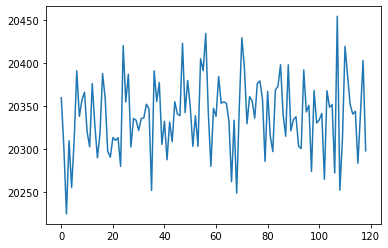

In [196]:
AIRI = 0.47*EPT + 0.19*CPT + 0.23*PSH - 0.24*NAT
final = AIRI * rainfallforAIRI.std() + rainfallforAIRI.mean()
plt.plot(final)

In [197]:
print(rainfallforAIRI)

[ 889.3      722.       791.80005  860.8      750.3      716.4
  884.89996  777.49994  897.       889.3      934.89996  736.30005
  805.80005  784.4      898.       780.6      950.6     1004.2
  650.8      884.5      719.       865.8      869.       823.
  862.6      803.60004  902.6      853.       767.7      821.1
  804.4      877.       803.4      975.8      913.39996  843.5
  908.19995  841.89996  908.19995  789.4      853.1      728.30005
  957.69995  868.2001   920.3      910.80005  903.60004  945.3
  873.89996  903.69995  876.9      738.8      792.9      922.89996
  885.30005  930.       983.2      788.5      889.3      944.1
  839.7     1020.2      809.8      857.9      922.5      709.39996
  739.9      860.1      754.6      831.       939.8      886.8
  652.8      913.4      748.       962.7      856.80005  883.2
  909.30005  707.7      882.8      852.19995  735.4      955.60004
  836.7      759.8      743.       697.1      961.5    ]


In [198]:
EPTdata = []
CPTdata = []
PSHdata = []
NATdata = []
rainfalldata = []
rainfalldataincorrect = []


for x in range (119):
    EPTdata.append(float(EPT[x]))
for x in range (119):
    CPTdata.append(float(CPT[x]))
for x in range (119):
    PSHdata.append(float(PSH[x]))
for x in range (119):
    NATdata.append(float(NAT[x]))

#X = [EPTdata, CPTdata, PSHdata, NATdata]

#using new rainfall dataset
for x in range (89):
    rainfalldataincorrect.append(float(rainfall[x+87]))

for y in range(119):
    rainfalldata.append(rainfallforAIRIfull[y+26])
        
#Y = [rainfalldata]

In [199]:
#Ydata = ((rainfalldata - np.mean(rainfalldata))/np.std(rainfalldata)) 
Ydatadetrend = signal.detrend(rainfalldata)
Ydata = (Ydatadetrend - np.mean(Ydatadetrend))/np.std(Ydatadetrend)

In [200]:
#cross validation loops
EPTregressiondata = []
CPTregressiondata = []
PSHregressiondata = []
NATregressiondata = []


for i in range (89):
    Xtrain = [] 
    Ytrain = []
    Ytest = [] #not being used
    Xtest = [] #not being used
    
    XEPTtrain = []
    XCPTtrain = []
    XPSHtrain = []
    XNATtrain = []
    for x in range(119): #119 - 30
        if (x < i or x > i+29):
            XEPTtrain.append(float(EPTdata[x]))
            XCPTtrain.append(float(CPTdata[x]))
            XPSHtrain.append(float(PSHdata[x]))
            XNATtrain.append(float(NATdata[x]))

    EPTdetrend = signal.detrend(XEPTtrain)
    EPTstd = EPTdetrend.std()
    EPTmean = EPTdetrend.mean()
    EPTfinal = (EPTdetrend - EPTmean)/EPTstd

    CPTdetrend = signal.detrend(XCPTtrain)
    CPTstd = CPTdetrend.std()
    CPTmean = CPTdetrend.mean()
    CPTfinal = (CPTdetrend - CPTmean)/CPTstd

    PSHdetrend = signal.detrend(XPSHtrain)
    PSHstd = PSHdetrend.std()
    PSHmean = PSHdetrend.mean()
    PSHfinal = (PSHdetrend - PSHmean)/PSHstd

    NATdetrend = signal.detrend(XNATtrain)
    NATstd = NATdetrend.std()
    NATmean = NATdetrend.mean()
    NATfinal = (NATdetrend - NATmean)/NATstd    

    Xtemp = []
    for x in range(89):
        Xtemp.append(float(EPTfinal[x]))
        Xtemp.append(float(CPTfinal[x]))
        Xtemp.append(float(PSHfinal[x]))
        Xtemp.append(float(NATfinal[x]))
    Xdata = np.array([Xtemp])
    Xtrain = Xdata.reshape(-1,4)
    #print(Xtrain)
    
    Ydata = []
    for x in range(119): #119 - 30
        if (x < i or x > i+29):
            Ydata.append(rainfalldata[x])
    Ydatadetrend = signal.detrend(Ydata)
    Ytrain = (Ydatadetrend - np.mean(Ydatadetrend))/np.std(Ydatadetrend)
        
    regressor = LinearRegression()
    regressor.fit(Xtrain, Ytrain)
    
    EPTregressiondata.append(regressor.coef_[0])
    CPTregressiondata.append(regressor.coef_[1])
    PSHregressiondata.append(regressor.coef_[2])
    NATregressiondata.append(regressor.coef_[3])

In [201]:
EPTregressionstd = np.std(EPTregressiondata)
CPTregressionstd = np.std(CPTregressiondata)
PSHregressionstd = np.std(PSHregressiondata)
NATregressionstd = np.std(NATregressiondata)

EPTregressionmean = np.mean(EPTregressiondata)
CPTregressionmean = np.mean(CPTregressiondata)
PSHregressionmean = np.mean(PSHregressiondata)
NATregressionmean = np.mean(NATregressiondata)

EPTregression = []
CPTregression = []
PSHregression = []
NATregression = []

EPTregression.append(EPTregressionstd)
EPTregression.append(EPTregressionmean)

CPTregression.append(CPTregressionstd)
CPTregression.append(CPTregressionmean)

PSHregression.append(PSHregressionstd)
PSHregression.append(PSHregressionmean)

NATregression.append(NATregressionstd)
NATregression.append(NATregressionmean)

#sqrt of n 1.96

#mean might not mean anything since data has been standardized
pd.DataFrame.from_items([('EPT', EPTregression), ('CPT', CPTregression), ('PSH', PSHregression), ('NAT', NATregression)], orient='index', columns=['Standard Deviation', 'Mean'])

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.


,Standard Deviation,Mean
EPT,0.049487,0.181897
CPT,0.042824,-0.079886
PSH,0.036292,-0.091239
NAT,0.029961,-0.121346


0.2291053560277212


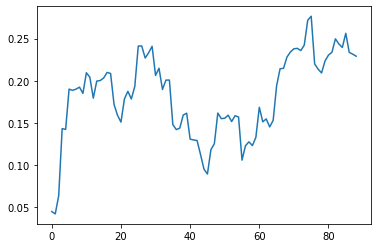

In [202]:
plt.plot(EPTregressiondata)
print(EPTregressiondata[88])

In [203]:
#AIRI = 0.47*EPT + 0.19*CPT + 0.23*PSH - 0.24*NAT

EPTconfidence95 = EPTregressionstd / np.sqrt(119)*1.96
print("EPT", EPTconfidence95)
CPTconfidence95 = CPTregressionstd / np.sqrt(119)*1.96
print("CPT", CPTconfidence95)
PSHconfidence95 = PSHregressionstd / np.sqrt(119)*1.96
print("PSH", PSHconfidence95)
NATconfidence95 = NATregressionstd / np.sqrt(119)*1.96
print("NAT", NATconfidence95)

EPT 0.008891477040325068
CPT 0.007694396869038523
PSH 0.0065206147179390685
NAT 0.005383228539872661


In [206]:
Ydatadetrend = signal.detrend(rainfalldata)
Ydata = (Ydatadetrend - np.mean(Ydatadetrend))/np.std(Ydatadetrend)

EPTtemp = []
CPTtemp = []
PSHtemp = []
NATtemp = []

Xtrain = []
for x in range(89):
    Xtrain.append(float(EPTdata[x]))
    Xtrain.append(float(CPTdata[x]))
    Xtrain.append(float(PSHdata[x]))
    Xtrain.append(float(NATdata[x]))
Xtrainarray = np.array([Xtrain])
Xdata = Xtrainarray.reshape(-1,4)


from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

lmodel = LinearRegression()

clf = SVC(kernel='linear', C=1) #isn't working
cv_results = cross_validate(lmodel, Xdata, Ydata, cv=119, return_estimator=True) 

EPTcoef = []
CPTcoef = []
PSHcoef = []
NATcoef = []

for model in cv_results['estimator']:
    EPTcoef.append(model.coef_[0])
    CPTcoef.append(model.coef_[1])
    PSHcoef.append(model.coef_[2])
    NATcoef.append(model.coef_[3])
    print(model.coef_)
    
    

ValueError: Found input variables with inconsistent numbers of samples: [89, 119]

In [ ]:
EPTregressionstd = np.std(EPTcoef)
CPTregressionstd = np.std(CPTcoef)
PSHregressionstd = np.std(PSHcoef)
NATregressionstd = np.std(NATcoef)

EPTregressionmean = np.mean(EPTcoef)
CPTregressionmean = np.mean(CPTcoef)
PSHregressionmean = np.mean(PSHcoef)
NATregressionmean = np.mean(NATcoef)

EPTmodel = []
CPTmodel = []
PSHmodel = []
NATmodel = []

EPTmodel.append(EPTregressionstd)
EPTmodel.append(EPTregressionmean)

CPTmodel.append(CPTregressionstd)
CPTmodel.append(CPTregressionmean)

PSHmodel.append(PSHregressionstd)
PSHmodel.append(PSHregressionmean)

NATmodel.append(NATregressionstd)
NATmodel.append(NATregressionmean)

#sqrt of n 1.96

#mean might not mean anything since data has been standardized
pd.DataFrame.from_items([('EPT', EPTmodel), ('CPT', CPTmodel), ('PSH', PSHmodel), ('NAT', NATmodel)], orient='index', columns=['Standard Deviation', 'Mean'])

In [ ]:
EPTconfidence95 = EPTregressionstd / np.sqrt(119)*1.96
print("EPT", EPTconfidence95)
CPTconfidence95 = CPTregressionstd / np.sqrt(119)*1.96
print("CPT", CPTconfidence95)
PSHconfidence95 = PSHregressionstd / np.sqrt(119)*1.96
print("PSH", PSHconfidence95)
NATconfidence95 = NATregressionstd / np.sqrt(119)*1.96
print("NAT", NATconfidence95)

In [ ]:
AIRI2 = 0.171496*EPT - 0.085912*CPT - 0.093845*PSH - 0.123344*NAT
final2 = AIRI2 * rainfallforAIRIfull.std() + rainfallforAIRIfull.mean()

In [ ]:
predictions = lm.predict(X_test)
plt.scatter(Y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
print('Score:', model.score(X_test, Y_test))

#doesn't make sense though, should run predictions against whole dataset
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

In [ ]:
trainingyears = []
for x in range(89):
    trainingyears.append(x+1900)

plt.figure(figsize=(12,8)) #label axis
plt.plot(trainingyears, rainfallforAIRI, label='original dataset')
plt.plot(trainingyears, rainfalldataincorrect, label='new dataset')
plt.legend()
#plt.plot(partial)